## BackGorund

In [61]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt 
import os
%matplotlib inline

### 0-implement the papers

In [123]:


import cv2 
import numpy as np
image = cv2.imread('Many.bmp')
#cv2.imshow('3_Orange', image)
#cv2.waitKey(0)

## The proper segmentation threshold of orange and on-line background after test was 35.
b,g,r = cv2.split(image)
_, th_35 = cv2.threshold(r,35, 255, cv2.THRESH_TOZERO)
_, th_45 = cv2.threshold(r,45, 255, cv2.THRESH_TOZERO)
_, th_55 = cv2.threshold(r,55, 255, cv2.THRESH_TOZERO)
_, th_65 = cv2.threshold(r,65, 255, cv2.THRESH_TOZERO)

#cv2.imshow('th_35', th_35)
cv2.imshow('th_45', th_45)
#cv2.imshow('th_55', th_55)
#cv2.imshow('th_65', th_65)
cv2.waitKey(0)

-1

### 1-Backgorund with mask and countour area

In [124]:
# Boundery with rectanhe
import cv2
import numpy as np
import  matplotlib as plt
# Load the image
img = cv2.imread('1.bmp')

# Convert the image to the HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds of the hue values for the orange color
lower_orange = np.array([10, 50, 50])
upper_orange = np.array([50, 255, 255])

# Threshold the image to create a binary mask
mask = cv2.inRange(hsv, lower_orange, upper_orange)

# Use the binary mask to extract the orange pixels and remove the background
result = cv2.bitwise_and(img, img, mask=mask)

# Show the result
#cv2.imshow("result.jpg", mask)
print(type(result))
cv2.waitKey(0)


# Convert the result to grayscale
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# Apply a Gaussian blur to the grayscale image to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use the Canny edge detection algorithm to find the edges in the blurred image
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edge map
cnts = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Loop over the contours
for i, c in enumerate(cnts):
    areaContour=cv2.contourArea(c)
    if areaContour<2000 or 5000<areaContour:
        continue
    cv2.drawContours(img,cnts,i,(255,10,255),4)

# Save the result
cv2.imshow("result.jpg", result)
cv2.waitKey(0)


<class 'numpy.ndarray'>


-1

# --------------------------------Detection-------------------------------------------------------------------------------

## Detection_0:

with hough transform

### Hough Circle Transform
#### Problem : -work with circule  and that make detction not acurrote

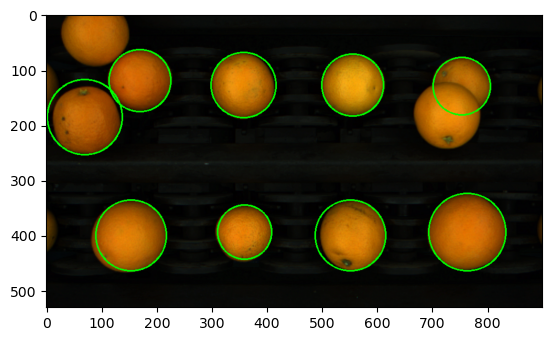

In [74]:
import cv2
import numpy as np

# Load image
img = cv2.imread('Many.bmp')

# Convert to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for orange color
lower_orange = np.array([0, 10, 40])
upper_orange = np.array([70, 255, 255])

# Threshold the image to extract orange color
mask = cv2.inRange(hsv, lower_orange, upper_orange)

# Apply Hough transform
circles = cv2.HoughCircles(mask, cv2.HOUGH_GRADIENT, dp=1, minDist=70, param1=50, param2=20, minRadius=10, maxRadius=700)

# Draw detected circles
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)

# # Display result
# cv2.imshow("Result", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Detectio_1
- contotors area (gray)

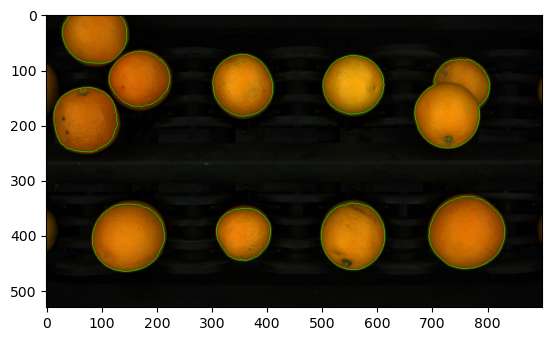

In [94]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np
 
# keep in mind that open CV loads images as BGR not RGB
resizedImage = cv2.imread("Many.bmp")

# convert image to grayscale
grayImage=cv2.cvtColor(resizedImage, cv2.COLOR_BGR2GRAY)

# THRESHOLD
# https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
estimatedThreshold, thresholdImage=cv2.threshold(grayImage,50,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

#Find radius
contours, hierarchy = cv2.findContours(thresholdImage, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# make a copy of the resized image since we are going to draw contours on the resized image
resizedImageCopy = np.copy(resizedImage)

# filter contours
for i, c in enumerate(contours):
    areaContour = cv2.contourArea(c)
    if areaContour < 5000 or 18000 < areaContour:
        continue
    cv2.drawContours(resizedImageCopy, contours, i, (0, 255, 0), 1)
# display the original image with contours and radii
# cv2.imshow('Image', resizedImageCopy)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(resizedImageCopy, cv2.COLOR_BGR2RGB))
plt.show()

### Detectio_2
- contotors area (HSV)

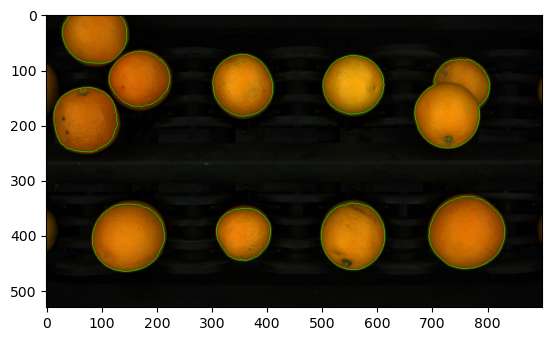

In [95]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np
 
# keep in mind that open CV loads images as BGR not RGB
image = cv2.imread("Many.bmp")

copy_img = image.copy()

# Convert the image to the HSV color space
hsv = cv.cvtColor(copy_img, cv.COLOR_BGR2HSV)

# Define the color range for orange and green in the HSV space
lower_orange_and_green = np.array([0,40, 40])
upper_orange_and_green = np.array([70, 255, 255])


# Threshold the image to get a binary mask
mask = cv.inRange(hsv, lower_orange_and_green, upper_orange_and_green)

# Find contours in the binary mask
contours, hierarchy = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
for contour in contours:
    area = cv.contourArea(contour)
    if area > 6000 : # 500 adjustable
        continue
    cv.drawContours(copy_img,[contour],0,(255,10,255),1)
    
plt.imshow(cv2.cvtColor(resizedImageCopy, cv2.COLOR_BGR2RGB))
plt.show()

### Detectio_3
- contotors area and convex hull (HSV)

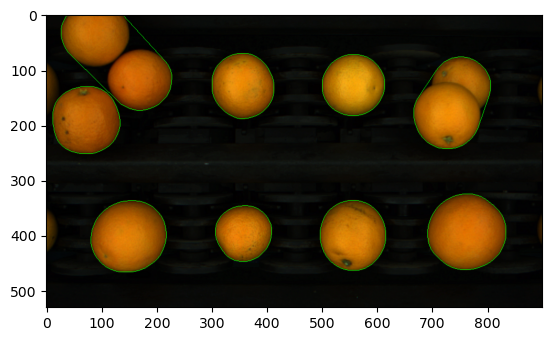

In [101]:
import cv2 as cv
import numpy as np

img = cv.imread('Many.bmp') 
copy_img = img.copy()
# Convert the image to the HSV color space
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Define the color range for orange and green in the HSV space
lower_orange_and_green = np.array([0,10, 40])
upper_orange_and_green = np.array([70, 255, 255])


# Threshold the image to get a binary mask
mask = cv.inRange(hsv, lower_orange_and_green, upper_orange_and_green)

# Find contours in the binary mask
contours, hierarchy = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

h,w,ch = img.shape

for contour in contours:
    area = cv.contourArea(contour)
    
    if area > 1000:  
        hull = cv.convexHull(contour)
        cv.drawContours(copy_img,[hull],0,(0,255,0),1)

result = cv.bitwise_and(img, img, mask=mask)

# cv.imshow('detection witg conex and area', copy_img)
# cv.waitKey(0)
# cv.destroyAllWindows()
plt.imshow(cv2.cvtColor(copy_img, cv2.COLOR_BGR2RGB))
plt.show()

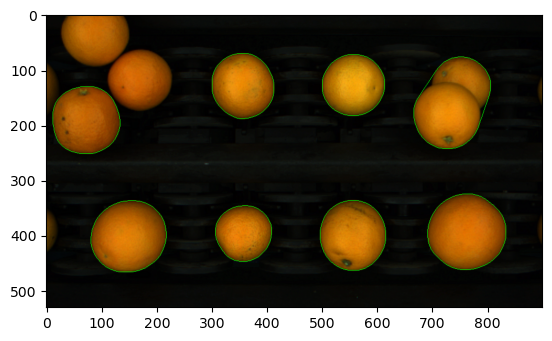

In [121]:
import cv2 as cv
import numpy as np

img = cv.imread('Many.bmp') 
copy_img = img.copy()
# Convert the image to the HSV color space
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Define the color range for orange and green in the HSV space
lower_orange_and_green = np.array([0,10, 40])
upper_orange_and_green = np.array([70, 255, 255])


# Threshold the image to get a binary mask
mask = cv.inRange(hsv, lower_orange_and_green, upper_orange_and_green)

# Find contours in the binary mask
contours, hierarchy = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

h,w,ch = img.shape

for contour in contours:
    area = cv.contourArea(contour)
    
    if area > 1000 and  area < 18000: # 500 adjustable 
        hull = cv.convexHull(contour)
        cv.drawContours(copy_img,[hull],0,(0,255,0),1)

result = cv.bitwise_and(img, img, mask=mask)

# cv.imshow('detection witg conex and area', copy_img)
# cv.waitKey(0)
# cv.destroyAllWindows()
plt.imshow(cv2.cvtColor(copy_img, cv2.COLOR_BGR2RGB))
plt.show()

#------------------------------------------------------------------------

### ignore _overlaping_0
- Area & Euclidean distance between the centers of the two contours

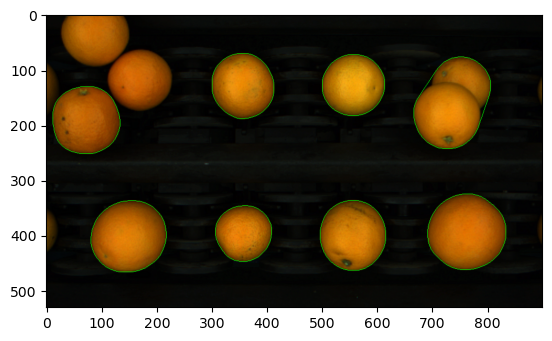

In [116]:
import cv2 as cv
import numpy as np

img = cv.imread('Many.bmp') 
copy_img = img.copy()
# Convert the image to the HSV color space
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Define the color range for orange in the HSV space
lower_orange = np.array([0, 10, 40])
upper_orange = np.array([70, 255, 255])

# Threshold the image to get a binary mask
mask = cv.inRange(hsv, lower_orange, upper_orange)

# Find contours in the binary mask
contours, hierarchy = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)


# Iterate through each contour and draw its convex hull if its distance to all other contours is greater than 5cm and its area is within the range of 1000 to 16000
valid_contours = []
for contour in contours:
    # Calculate the area and center of mass for the contour
    area = cv.contourArea(contour)
    if area < 1000 or area > 18000:
        continue
    moments = cv.moments(contour)
    center_x = int(moments["m10"] / moments["m00"])
    center_y = int(moments["m01"] / moments["m00"])
    
    # Check the distance between the center of this contour and all other valid contours
    valid = True
    for valid_contour in valid_contours:
        # Calculate the center of mass for the other contour
        other_moments = cv.moments(valid_contour)
        other_center_x = int(other_moments["m10"] / other_moments["m00"])
        other_center_y = int(other_moments["m01"] / other_moments["m00"])
        
        # Calculate the Euclidean distance between the centers of the two contours
        distance = np.sqrt((center_x - other_center_x)**2 + (center_y - other_center_y)**2)
        
        # If the distance is less than 5cm, mark this contour as invalid and break out of the loop
        if distance < 10 * h / 29:
            valid = False
            break
    
    # If the contour is valid, add it to the list of valid contours and draw its convex hull on the image
    if valid:
        valid_contours.append(contour)
        hull = cv.convexHull(contour)
        cv.drawContours(copy_img, [hull], 0, (0, 255, 0), 1)

# cv.imshow('detection witg conex and area', copy_img)
# cv.waitKey(0)
# cv.destroyAllWindows()
plt.imshow(cv2.cvtColor(copy_img, cv2.COLOR_BGR2RGB))
plt.show()

### ignore _orplaving_0
- area or  elpice work will with all imges but not with Many.bmp

In [31]:
import cv2 as cv
import numpy as np

image = cv.imread('5555203_1_540_Original.bmp')
copy_img = image.copy()

# Convert the image to the HSV color space
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
# Define the color range for orange and green in the HSV space
lower_orange_and_green = np.array([0,40, 40])
upper_orange_and_green = np.array([70, 255, 255])

hsv_copy = img.copy()
# Threshold the image to get a binary mask
mask = cv.inRange(hsv, lower_orange_and_green, upper_orange_and_green)

# Find contours in the binary mask
contours, hierarchy = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# Filter the contours area that are less than 500
filtered_contours = [contour for contour in contours if cv.contourArea(contour) >= 500]
# apply convex hull to the filtered contours
hull_contours = [cv.convexHull(contour) for contour in filtered_contours]

# make a mask with only the hull contours
mask_2 = np.zeros_like(hsv, dtype=np.uint8)
mask_2 = cv.cvtColor(mask_2, cv.COLOR_BGR2GRAY)
cv.drawContours(mask_2, hull_contours, -1, (255,255,255), thickness= cv.FILLED)
# apply the mask to the image
image_copy = cv.bitwise_and(image,image, mask=mask_2)
contour_area = []
for contour in hull_contours:
    area = cv.contourArea(contour)

    (x, y), (major_axis, minor_axis), angle = cv.fitEllipse(contour)
    ellipticity = major_axis / minor_axis
    perimeter = cv.arcLength(contour, True)
    # Calculate circularity as 4*pi*area/perimeter^2
    circularity = (4 * np.pi * area) / (perimeter * perimeter)

    # Define circularity and ellipticity thresholds based on your requirements
    circularity_threshold = 0.95
    ellipticity_threshold = 0.95

    # If the contour's circularity and ellipticity are above the thresholds, consider it as an orange
    if circularity > circularity_threshold or ellipticity > ellipticity_threshold:
        # draw the contour
        cv.drawContours(image_copy, [contour], 0, (0,255,0), 3)

        # find the moments of the contour
        M = cv.moments(contour)
        # calculate the centroid of the contour
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        radius = int(np.sqrt(area/np.pi))
        cv.putText(image_copy, "r=%d" % radius, (cx-radius, cy-radius), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)



cv.imshow('image',image_copy)
cv.imshow('mask',mask_2)
cv.waitKey(0)
cv.destroyAllWindows()

# plt.imshow(cv2.cvtColor(hsv_copy, cv2.COLOR_BGR2RGB))
# plt.show()